# Basic Python Programming
## For Mechatronic Systems Development

---
### Python as a Language
- High-level, interpreted, dynamically typed
- Supports multiple paradigms: Procedural, Object-oriented, and Functional
- **Batteries included:** rich standard library
- Industry standard for robotics (ROS, simulation, data science)
- Readable syntax that encourages clean code

## Why Python for Mechatronics?

### Advantages
- Fast prototyping and iteration
- Extensive libraries: NumPy, SciPy, matplotlib
- ROS (Robot Operating System) native support
- Easy to learn but powerful

### Limitations
- Slower than C/C++ for real-time
- Good enough for most control loops (100 Hz+)
- Use C/C++ for ultra-low-latency hardware drivers

## Variables and Basic Types
- No type declaration needed – Python infers types
- Variables are names that bind to objects

In [24]:
# Numeric types
answer = 42                    # int
temperature = 36.5             # float
pi = 3.14159                   # float

# String type
greeting = "Hello, Python!"    # str
name = 'Alice'                 # str

# Boolean type
is_active = True               # bool
is_error = False               # bool

print(f"Temperature: {temperature}, Active: {is_active}")

Temperature: 36.5, Active: True


## Arithmetic and Comparison Operators

In [25]:
x = 10
y = 3

print(x + y)      # 13    (addition)
print(x // y)     # 3     (floor division)
print(x % y)      # 1     (modulo / remainder)
print(x ** y)     # 1000  (exponentiation)

# Comparison
print(x > y)      # True
print(0.0 <= temperature <= 100.0)  # Chaining comparisons

13
3
1
1000
True
True


## Lists and List Comprehensions
Lists are ordered, mutable collections. List comprehensions offer a concise way to create them.

In [26]:
data = [1, 2, 3]
data.append(4)

# List comprehension: sensor data filtering
readings = [0.1, 0.5, 2.3, 0.2, 1.1]
valid = [r for r in readings if r < 2.0]
print(f"Valid readings: {valid}")

Valid readings: [0.1, 0.5, 0.2, 1.1]


## Dictionaries and Control Flow
Dictionaries map keys to values, ideal for configurations.

In [27]:
config = {
    "sample_rate_hz": 100,
    "max_voltage": 12.0,
    "port": "COM3",
}

temperature = 85.0
if temperature > 80.0:
    print("Warning: high temperature!")
else:
    print("Normal range.")

## Example Logging Simple Sensor data

PseudoCode:
```
BEGIN PROGRAM

    DEFINE system_name

    INITIALIZE temperature_c
    INITIALIZE voltage

    DEFINE safe_temperature_min
    DEFINE safe_temperature_max
    DEFINE safe_voltage_min
    DEFINE safe_voltage_max

    READ temperature sensor → temperature_c
    READ voltage sensor → voltage

    CONVERT temperature_c to temperature_f

    IF temperature_c is within safe_temperature range THEN
        temperature_safe ← TRUE
    ELSE
        temperature_safe ← FALSE
    END IF

    IF voltage is within safe_voltage range THEN
        voltage_safe ← TRUE
    ELSE
        voltage_safe ← FALSE
    END IF

    IF temperature_safe AND voltage_safe THEN
        system_status ← "OK"
    ELSE
        system_status ← "FAULT"
    END IF

    PRINT system_name
    PRINT temperature in Celsius and Fahrenheit
    PRINT voltage
    PRINT system_status

END PROGRAM

```

In [4]:
def celsius_to_fahrenheit(temp_c: float) -> float:
    return temp_c * 9 / 5 + 32


temperature_c = 70.0
voltage = 12.0
system_name = "Motor Controller"
is_running = True

temperature_f = celsius_to_fahrenheit(temperature_c)

temp_safe = 0.0 <= temperature_c <= 80.0
voltage_safe = 0.0 <= voltage <= 24.0
system_safe = temp_safe and voltage_safe

status = "OK" if system_safe else "FAULT"

print(
    f"[{system_name}] "
    f"Temp: {temperature_c:.1f}°C ({temperature_f:.1f}°F), "
    f"Voltage: {voltage:.1f} V, "
    f"Status: {status}"
)


[Motor Controller] Temp: 70.0°C (158.0°F), Voltage: 12.0 V, Status: OK


## Classes and Objects
Objects group related data and behavior. In Mechatronics, this is used for hardware abstraction.

In [28]:
class Motor:
    """Motor command with validation."""
    def __init__(self) -> None:
        self._command = 0.0 # Private attribute convention

    def set_command(self, value: float) -> None:
        if not 0.0 <= value <= 6.29: # Validation
            raise ValueError(f"Out of range: {value}")
        self._command = value

    @property
    def command(self) -> float:
        return self._command

motor = Motor()
motor.set_command(3.14)
print(f"Motor Command: {motor.command}")

Motor Command: 3.14


## Visualization with Matplotlib (2D & 3D)
Plotting is essential for understanding system behavior.

In [22]:
!pip install --upgrade matplotlib

Defaulting to user installation because normal site-packages is not writeable


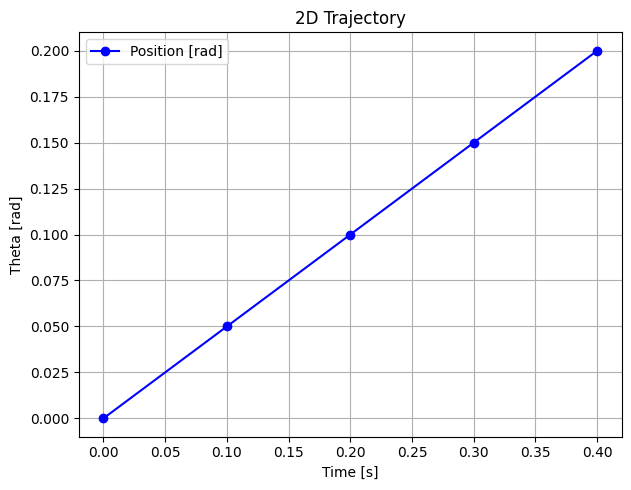

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def plot_mechatronic_data():
    """
    Visualizes 2D position data and 3D helical trajectories.
    Demonstrates professional plotting practices by avoiding global state.
    """
    # 1. Generate Data using NumPy (Lecture Topic 2)
    times = np.linspace(0, 0.4, 5)
    positions = [0.0, 0.05, 0.1, 0.15, 0.2]
    
    # Helical trajectory (Spiral)
    t_3d = np.linspace(0, 4 * np.pi, 100)
    x = np.cos(t_3d)
    y = np.sin(t_3d)
    z = t_3d / (2 * np.pi)

    # 2. Setup Figure (Professional layout)
    fig = plt.figure(figsize=(12, 5))

    # --- Subplot 1: 2D Trajectory ---
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(times, positions, 'b-o', label="Position [rad]")
    ax1.set_xlabel("Time [s]")
    ax1.set_ylabel("Theta [rad]")
    ax1.set_title("2D Trajectory")
    ax1.grid(True)
    ax1.legend()
    
    plt.tight_layout()
    plt.show()

# Professional Entry Point (Lecture Topic 3)
if __name__ == "__main__":
    plot_mechatronic_data()

## Good Practices Summary
1. **Use type hints**
2. **Name clearly** (e.g., `position_rad`)
3. **Single Responsibility** (One class/function = one purpose)
4. **Handle exceptions**
5. **Document functions** with docstrings
6. **DRY principle** (Don't Repeat Yourself)

## NumPy Fundamentals for Mechatronics
In mechatronics, NumPy is used to handle sensor arrays, coordinate transformations, and control matrices.
### 1. Array Creation and Inspection
Instead of standard Python lists, we use numpy.ndarray for faster mathematical operations.

In [36]:
import numpy as np

# Creating an array from a list
sensor_readings = np.array([1.2, 3.4, 0.8, 2.5])

# Creating arrays of zeros or ones (useful for pre-allocating memory)
voltage_buffer = np.zeros(10)
control_constants = np.ones(3)

# Creating a range (useful for time-series data)
# Start at 0, stop before 2, step by 0.5
time_steps = np.arange(0, 2, 0.5)

print(f"Time steps: {time_steps}")
print(f"Array Shape: {time_steps.shape}") # (4,)

Time steps: [0.  0.5 1.  1.5]
Array Shape: (4,)


## 2. Basic Operations (Element-wise)

In engineering, we often need to scale values (e.g., converting ADC units to Voltage).

In [37]:
# Scalar multiplication (Scaling)
raw_readings = np.array([102, 512, 1023])
normalized = raw_readings / 1023.0

# Addition of two signals
signal_a = np.array([1, 2, 3])
noise = np.array([0.1, -0.1, 0.2])
combined = signal_a + noise

print(f"Noisy signal: {combined}")

Noisy signal: [1.1 1.9 3.2]


## 3. Indexing, Slicing, and Reshaping

You can extract specific segments of a data stream or reshape 1D data into matrices.

In [38]:
data_stream = np.array([10, 20, 30, 40, 50])

# Slicing: get the first three elements
start_burst = data_stream[0:3]

# Reshaping: convert 6 elements into a 2x3 matrix (e.g., IMU data)
imu_data = np.array([0.1, 0.2, 0.3, -0.1, -0.2, -0.3])
rotation_matrix = imu_data.reshape(2, 3)

print(f"Reshaped Data:\n{rotation_matrix}")

Reshaped Data:
[[ 0.1  0.2  0.3]
 [-0.1 -0.2 -0.3]]


In [40]:
import numpy as np

# 1. Create a 1D array of 12 elements (e.g., raw readings)
raw_readings = np.arange(12) 
# Result: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

# 2. Reshape to a 2D array (3 rows, 4 columns)
# This could represent 3 sensors taking 4 readings each
sensor_matrix = raw_readings.reshape(3, 4)

print("Original 1D Array:\n", raw_readings)
print("\nReshaped 2D Matrix:\n", sensor_matrix)

# 3. Reshape to a 3D array (2 pages, 3 rows, 2 columns)
# Represents 2 sensor stations, 3 time steps, 2 axes each
volumetric_data = raw_readings.reshape(2, 3, 2)

print("\nReshaped 3D Tensor:\n", volumetric_data)


Original 1D Array:
 [ 0  1  2  3  4  5  6  7  8  9 10 11]

Reshaped 2D Matrix:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

Reshaped 3D Tensor:
 [[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]
